In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [8]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [9]:
# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


In [10]:

# Define the CNN model architecture
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [11]:

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [12]:

# Train the model
history_cnn = model_cnn.fit(X_train, y_train, epochs=25, validation_split=0.2, verbose=0)



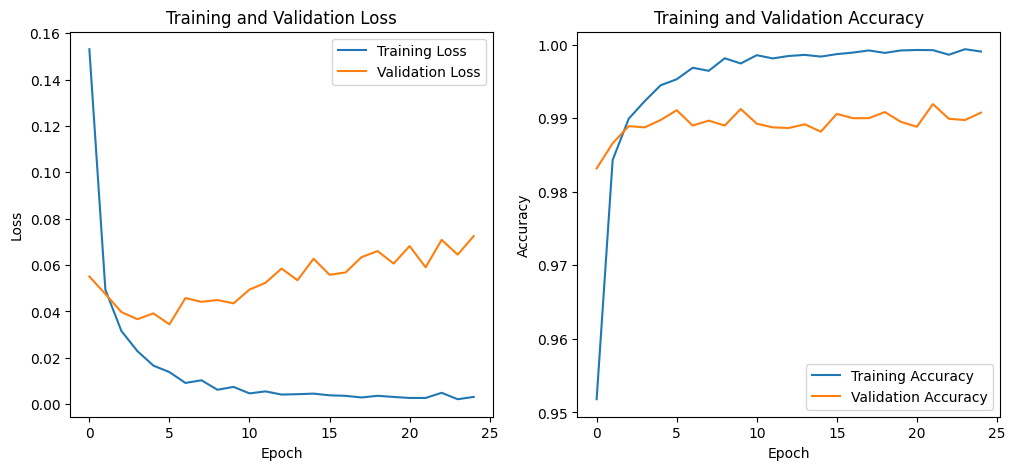

In [13]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [14]:
# Evaluate the model
y_prob_cnn = model_cnn.predict(X_test)
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)
accuracy = accuracy_score(y_test, y_pred_cnn)
print("Test Accuracy:", accuracy)



313/313 [==============================] - 2s 4ms/step
Test Accuracy: 0.9903


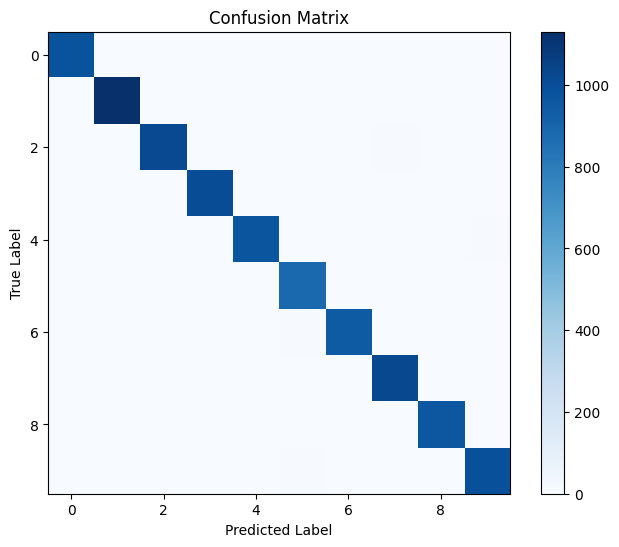

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [16]:
# Classification Report
class_report = classification_report(y_test, y_pred_cnn)
print("Classification Report:\n", class_report)




Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



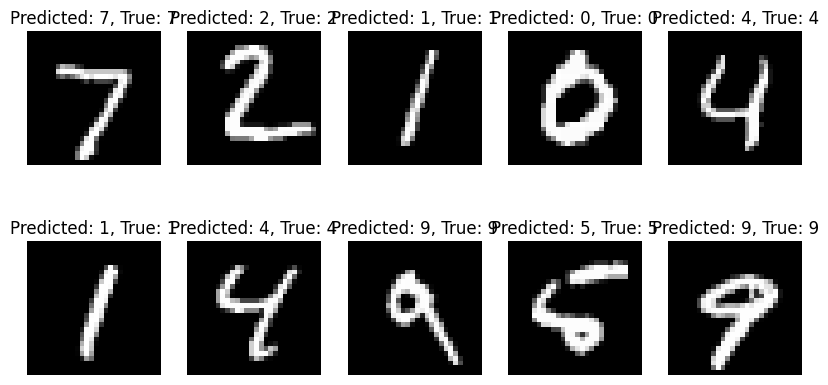

In [17]:
# Plot example predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred_cnn[i]}, True: {y_test[i]}")
    plt.axis('off')

plt.show()